# Planet Viewing Example

This example shows how to plot geometric quantities using the frames system.


First we import numpy and the plotting module.

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from godot.core import num, tempo, astro
from godot import cosmos

# optionally avoid verbose logging messages
import godot.core.util as util
util.suppressLogger()

Then we import GODOT modules and create a universe from configuration.

The [universe](./universe.yml) contains an entry to insert a keplerian orbit point, named 'SC' into the frames system.

In [23]:
# create the universe
uni_config = cosmos.util.load_yaml('lunar_orbits.yml')
uni = cosmos.Universe(uni_config)

We setup the universe as defined in the yml file.
Furthermore we define a timespan, here one month, evaluated in 30 seconds timesteps.

Besides the earth hiding, we want to know wether the moon blocks the view of the spacecraft. This can be done by calculating if the vector between the ground station and the SC intersects the surface of the moon. If the vector does, and the spacecraft is closer to the groundstation than the moon, it is still visible

2026-05-01T00:00:00.000001 TDB
[2.94787525 0.1741651 ]


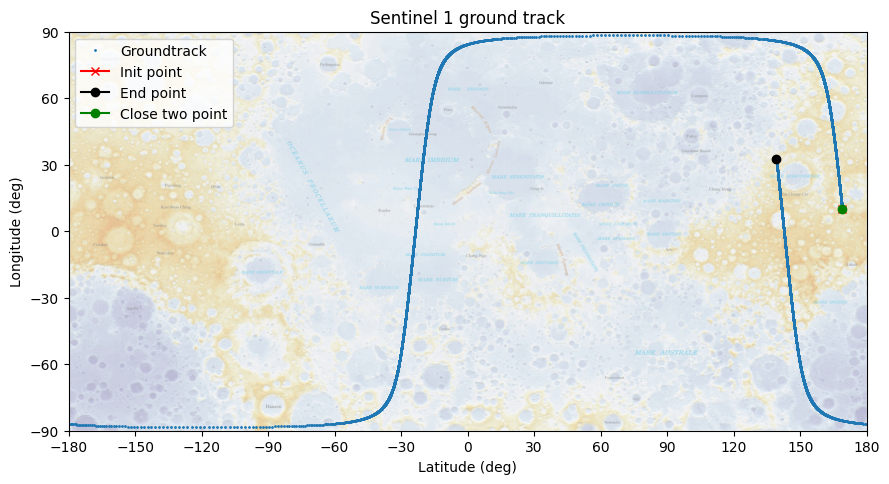

In [24]:
t1 = tempo.Epoch('2026-05-01T00:00:00 TDB')
t2 = tempo.Epoch('2026-05-01T02:00:00 TDB')
ran = tempo.EpochRange(t1, t2)
eps = 1e-6
tol = 1e-6
grid = ran.contract(eps).createGrid(1.0)  # Use smaller grid spacing for finer resolution

def subsat_point(epoch):
    pos = uni.frames.vector3("Moon", "SC", "ITRF", epoch)  # Use Moon-centered frame
    pol = astro.sphericalFromCart(pos)  # [radius, longitude, latitude]
    return pol[1:]  # [longitude, latitude]

points = np.asarray([subsat_point(e) for e in grid])

poslist = []
init = uni.frames.vector3("Moon", "SC", "ITRF", t1)  # Use Moon-centered frame
end = uni.frames.vector3("Moon", "SC", "ITRF", t2)  # Use Moon-centered frame
for e in grid:
    pos = uni.frames.vector3("Moon", "SC", "ITRF", e)  # Use Moon-centered frame
    if np.sqrt(np.sum(np.power(init - pos, 2))) < 0.8:
        print(e)
        poslist.append(astro.sphericalFromCart(pos)[1:])
        print(astro.sphericalFromCart(pos)[1:])
poslist = np.array(poslist)

init = astro.sphericalFromCart(uni.frames.vector3("Moon", "SC", "ITRF", t1))[1:]
end = astro.sphericalFromCart(uni.frames.vector3("Moon", "SC", "ITRF", t2))[1:]

img = plt.imread("moon2.png")
fig = plt.figure(figsize=(9, 5))

plt.title('Sentinel 1 ground track')
plt.xlabel('Latitude (deg)')
plt.ylabel('Longitude (deg)')

plt.imshow(img, extent=[-180, 180, -90, 90], alpha=0.5)
plt.plot(num.Rad * points[:, 0], num.Rad * points[:, 1], '.', markersize=2, label="Groundtrack")
plt.plot(num.Rad * init[0], num.Rad * init[1], marker='x', color='r', label='Init point')
plt.plot(num.Rad * end[0], num.Rad * end[1], marker='o', color='k', label='End point')
plt.plot(num.Rad * poslist[:, 0], num.Rad * poslist[:, 1], marker='o', color='g', label='Close two point')

plt.legend()
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.xticks(np.linspace(-180, 180, 13))
plt.yticks(np.linspace(-90, 90, 7))
plt.tight_layout()
plt.show()


2026-05-01T00:00:00.000001 TDB
[0.40968341 0.01176596]
2026-05-01T00:00:30.000001 TDB
[0.40968341 0.01176596]
2026-05-01T00:01:00.000001 TDB
[0.40968341 0.01176596]
2026-05-01T00:01:30.000001 TDB
[0.40968341 0.01176596]
2026-05-01T00:02:00.000001 TDB
[0.40968341 0.01176596]
2026-05-01T00:02:30.000001 TDB
[0.40968341 0.01176596]
2026-05-01T00:03:00.000001 TDB
[0.40968341 0.01176596]
2026-05-01T00:03:30.000001 TDB
[0.40968341 0.01176596]
2026-05-01T00:04:00.000001 TDB
[0.40968341 0.01176596]
2026-05-01T00:04:30.000001 TDB
[0.40968341 0.01176596]
2026-05-01T00:05:00.000001 TDB
[0.40968341 0.01176596]
2026-05-01T00:05:30.000001 TDB
[0.40968341 0.01176596]
2026-05-01T00:06:00.000001 TDB
[0.40968341 0.01176596]
2026-05-01T00:06:30.000001 TDB
[0.40968341 0.01176596]
2026-05-01T00:07:00.000001 TDB
[0.40968341 0.01176596]
2026-05-01T00:07:30.000001 TDB
[0.40968341 0.01176596]
2026-05-01T00:08:00.000001 TDB
[0.40968341 0.01176596]
2026-05-01T00:08:30.000001 TDB
[0.40968341 0.01176596]
2026-05-01

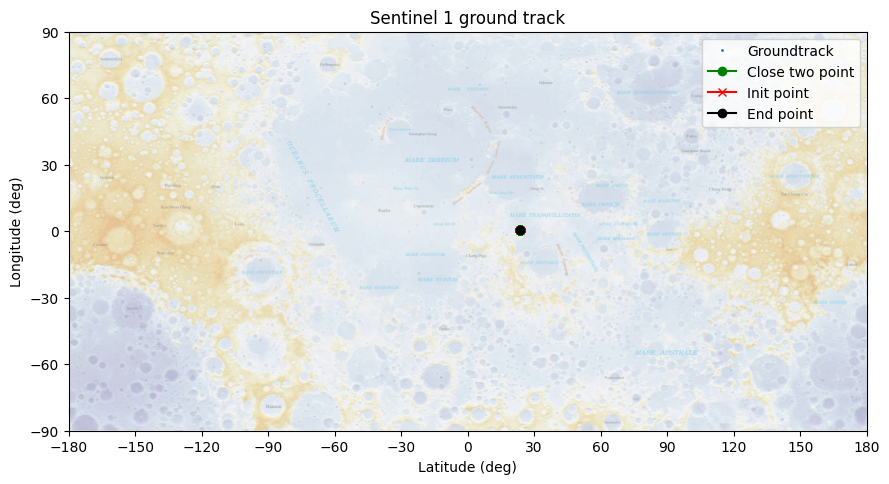

In [ ]:
t1 = tempo.Epoch('2026-05-01T00:00:00 TDB')
t2 = tempo.Epoch('2026-05-05T01:50:00 TDB')
ran = tempo.EpochRange(t1, t2)
eps = 1e-6
tol = 1e-6
grid = ran.contract(eps).createGrid(30.0)  # Use smaller grid spacing for finer resolution

cent = 'Moon'
base = 'SC'
#base = 'A11'
axis = 'ITRF'
axis = 'MoonIAU2009'
def subsat_point(epoch):
    pos = uni.frames.vector3(cent, base, axis, epoch)  # Use Moon-centered frame
    pol = astro.sphericalFromCart(pos)  # [radius, longitude, latitude]
    return pol[1:]  # [longitude, latitude]

points = np.asarray([subsat_point(e) for e in grid])

poslist = []
init = uni.frames.vector3(cent, base, axis, t1)  # Use Moon-centered frame
end = uni.frames.vector3(cent, base, axis, t2)  # Use Moon-centered frame

img = plt.imread("moon2.png")
fig = plt.figure(figsize=(9, 5))

plt.title('Sentinel 1 ground track')
plt.xlabel('Latitude (deg)')
plt.ylabel('Longitude (deg)')

plt.imshow(img, extent=[-180, 180, -90, 90], alpha=0.5)
plt.plot(num.Rad * points[:, 0], num.Rad * points[:, 1], '.', markersize=2, label="Groundtrack")
#if axis != 'MoonIAU2009':
if True:
    for e in grid:
        pos = uni.frames.vector3(cent, base, axis, e)  # Use Moon-centered frame
        if np.sqrt(np.sum(np.power(init - pos, 2))) < 0.8:
            print(e)
            poslist.append(astro.sphericalFromCart(pos)[1:])
            print(astro.sphericalFromCart(pos)[1:])
    poslist = np.array(poslist)
    plt.plot(num.Rad * poslist[:, 0], num.Rad * poslist[:, 1], marker='o', color='g', label='Close two point')
init = astro.sphericalFromCart(uni.frames.vector3(cent, base, axis, t1))[1:]
end = astro.sphericalFromCart(uni.frames.vector3(cent, base, axis, t2))[1:]
plt.plot(num.Rad * init[0], num.Rad * init[1], marker='x', color='r', label='Init point')
plt.plot(num.Rad * end[0], num.Rad * end[1], marker='o', color='k', label='End point')

plt.legend()
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.xticks(np.linspace(-180, 180, 13))
plt.yticks(np.linspace(-90, 90, 7))
plt.tight_layout()
plt.show()


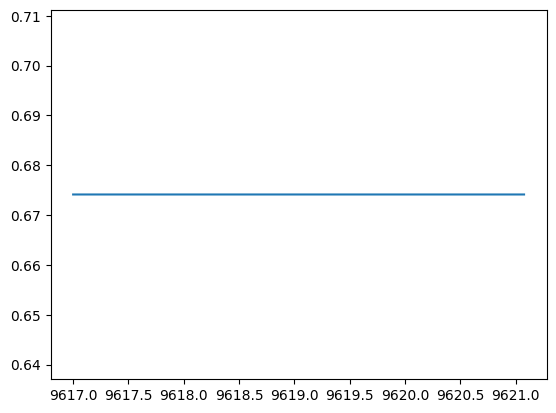

In [30]:
times = [time.mjd() for time in grid]
plt.plot(times, points[:,1]*num.Rad)
plt.show()